# 넷플릭스 데이터 시각화

1. 구독 유형별 평균 시청 시간
    - Basic, Standard, Premium 구독자들의 평균 시청 시간 비교
    - 막대 그래프와 꺾은선 그래프로 동시에 표현

2. 장르별 평균 시청 시간
    - 각 장르별 평균 시청 시간을 내림차순으로 정렬하여 표시
    - 어떤 장르가 가장 많은 시청 시간을 기록했는지 확인 가능

3. 연령대별 평균 시청 시간
    - 사용자를 6개 연령대로 구분하여 시청 시간 분석
    - 연령대별 시청 패턴 파악 가능

4. 장르, 국가별 시청 시간 (Boxplot 그래프)
5. 국가별 시청 시간 (막대 그래프, 꺾은선 그래프)
6. 연령대별 시청 시간 (Seaborn Pairplot 그래프)
7. 연령대별 시청 시간 (Seaborn Heatmap 그래프)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
netflix_df = pd.read_csv('data/netflix_users.csv')
netflix_df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27


In [72]:
netflix_df.info()  #결측치 없음

netflix_df = netflix_df.drop(columns=['User_ID'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [73]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows용 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 정상 표시 (음수 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False


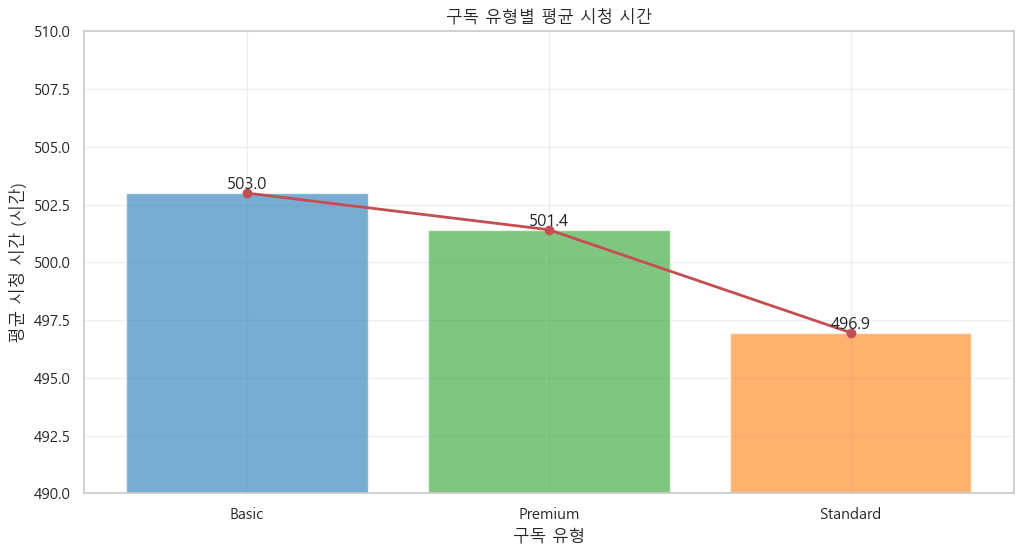

In [74]:
# 구독 유형별 평균 시청 시간 (막대 그래프 + 꺾은선 그래프)
plt.figure(figsize=(12, 6))

# 데이터 준비
subscription_avg = netflix_df.groupby('Subscription_Type')['Watch_Time_Hours'].mean()
subscription_types = subscription_avg.index

# 원하는 색상 지정
colors = {
    'Basic': '#1f77b4',     # 파랑
    'Standard': '#ff7f0e',  # 주황
    'Premium': '#2ca02c'    # 초록
}
bar_colors = [colors[stype] for stype in subscription_types]

# 막대 그래프
bars = plt.bar(subscription_types, subscription_avg.values, alpha=0.6, color=bar_colors)
plt.bar_label(bars, fmt='%.1f')

# 꺾은선 그래프 (색 고정: 빨강)
plt.plot(subscription_types, subscription_avg.values, 'ro-', linewidth=2)

plt.title('구독 유형별 평균 시청 시간', fontsize=12)
plt.xlabel('구독 유형')
plt.ylabel('평균 시청 시간 (시간)')
plt.ylim([490, 510])
plt.grid(True, alpha=0.3)
plt.show()


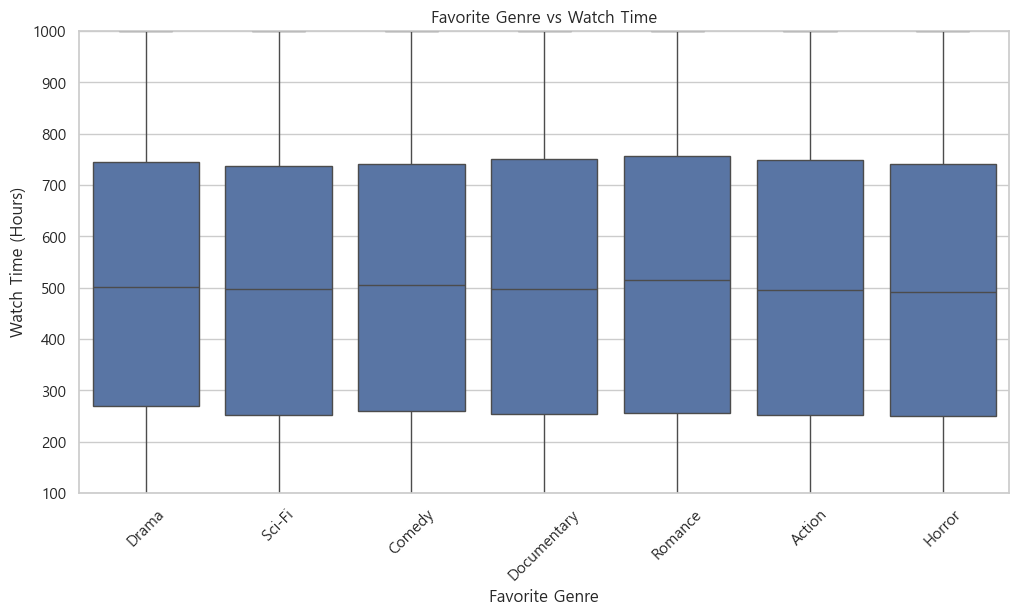

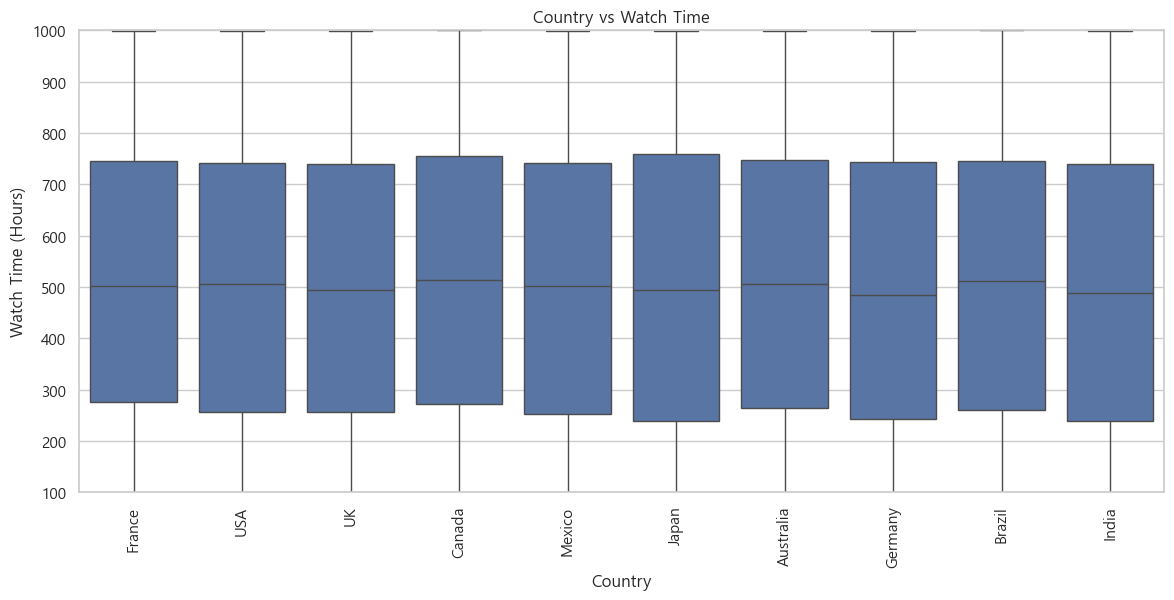

In [75]:
#4. Seaborn Boxplot

# Favorite genre vs Watch time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Watch_Time_Hours', data=netflix_df)
plt.title('Favorite Genre vs Watch Time')
plt.xticks(rotation=45)
plt.xlabel('Favorite Genre')
plt.ylabel('Watch Time (Hours)')
plt.ylim([100, 1000])
plt.show()

# Country vs Watch time
plt.figure(figsize=(14, 6))
sns.boxplot(x='Country', y='Watch_Time_Hours', data=netflix_df)
plt.title('Country vs Watch Time')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Watch Time (Hours)')
plt.ylim([100, 1000])
plt.show()


In [76]:
#5. <<국가별>> 평균 시청 시간 (상위 10개 국가)
country_analysis = netflix_df.groupby('Country')['Watch_Time_Hours'].agg(['mean', 'count'])
top_10_countries = country_analysis.nlargest(10, 'mean')
print("\n상위 10개 국가 분석:")
print(top_10_countries)



상위 10개 국가 분석:
                 mean  count
Country                     
Canada     511.423241   2490
Australia  508.207136   2437
France     506.039248   2473
Brazil     503.951806   2503
USA        501.357591   2503
Mexico     496.487858   2493
UK         496.065073   2592
Japan      494.820716   2457
Germany    494.568272   2547
India      492.242523   2505


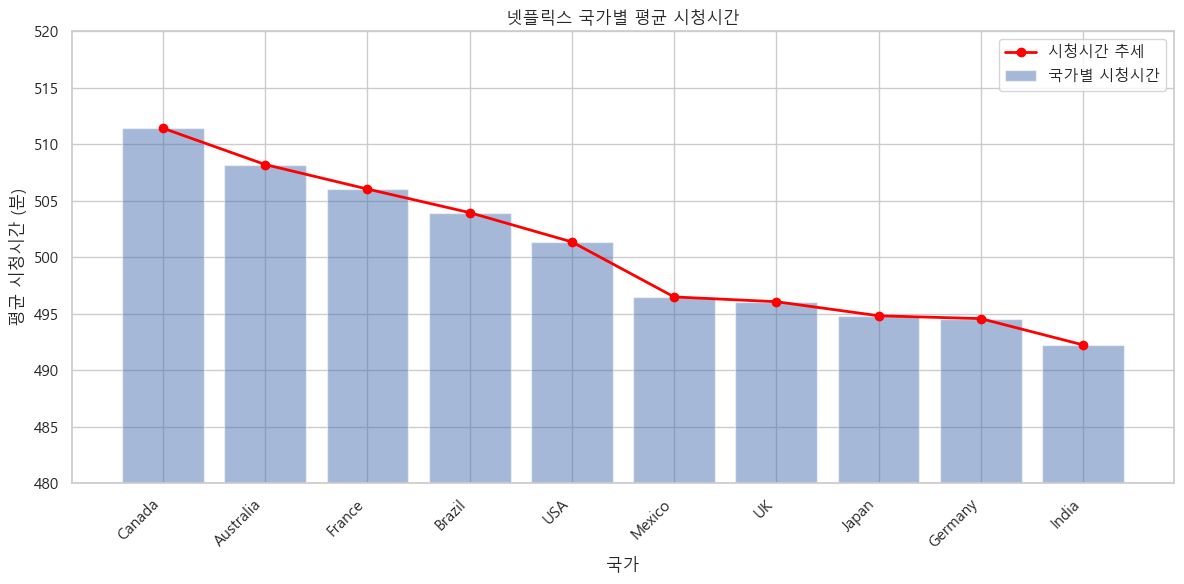

In [77]:
# 국가별 평균 시청시간 계산
avg_time_by_country = netflix_df.groupby('Country')['Watch_Time_Hours'].mean().sort_values(ascending=False)
# 그래프 생성
plt.figure(figsize=(12, 6))

# 막대 그래프
bars = plt.bar(avg_time_by_country.index, avg_time_by_country.values, alpha=0.5)

# 꺾은선 그래프
line = plt.plot(avg_time_by_country.index, avg_time_by_country.values,
                color='red', marker='o', linewidth=2)

# 그래프
plt.xlabel('국가')
plt.ylabel('평균 시청시간 (분)')
plt.ylim([480, 520])
plt.title('넷플릭스 국가별 평균 시청시간')
plt.xticks(rotation=45, ha='right')
plt.legend(['시청시간 추세', '국가별 시청시간'])
plt.tight_layout()
plt.show()

C:\Users\Playdata2\AppData\Local\Temp\ipykernel_8848\115946057.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_8848\115946057.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_8848\115946057.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_8848\115946057.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variab

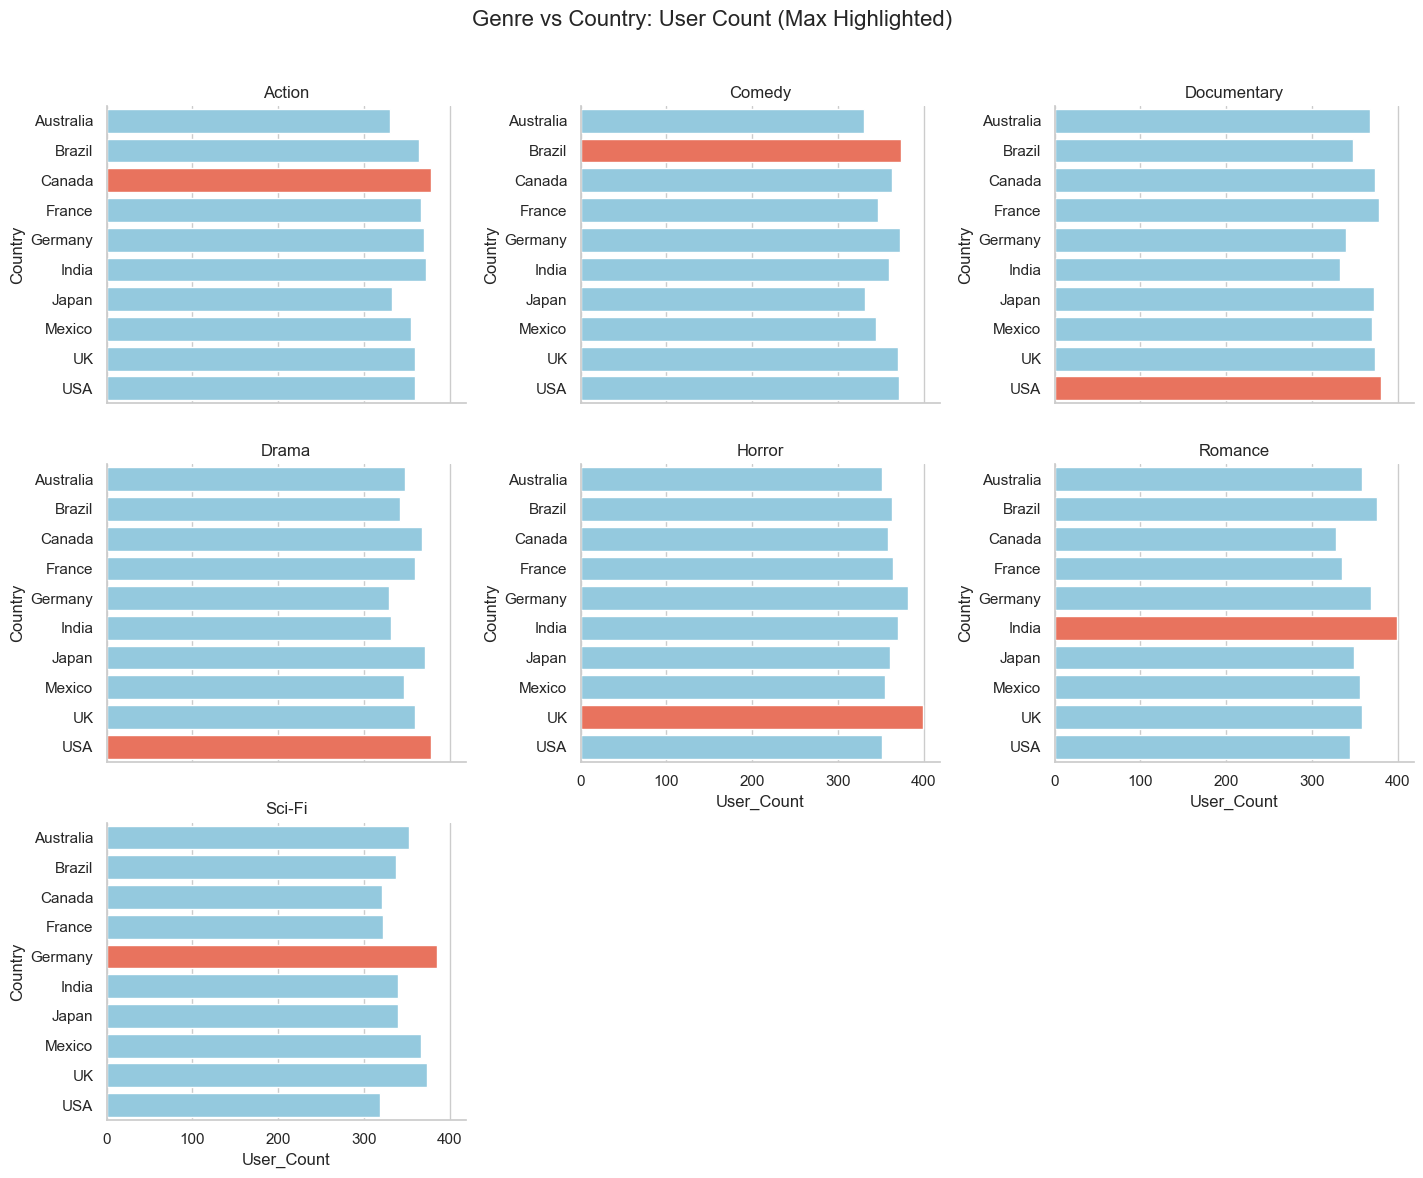

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석 대상 장르 리스트
genres = ['Horror', 'Documentary', 'Action', 'Romance', 'Comedy', 'Drama', 'Sci-Fi']
filtered_df = netflix_df[netflix_df['Favorite_Genre'].isin(genres)]

# 장르별 국가별 사용자 수 집계
genre_country_counts = (
    filtered_df.groupby(['Favorite_Genre', 'Country'])
    .size()
    .reset_index(name='User_Count')
)

# 각 장르별 최대값 국가 마킹
genre_country_counts['Is_Max'] = genre_country_counts.groupby('Favorite_Genre')['User_Count'].transform('max') == genre_country_counts['User_Count']

# 시각화 (각 장르별 FacetGrid)
sns.set(style="whitegrid")
g = sns.FacetGrid(
    genre_country_counts,
    col="Favorite_Genre",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False
)

# 막대그래프 수동으로 그리기 (색 분기)
def draw_bar(data, color, **kwargs):
    palette = ['tomato' if is_max else 'skyblue' for is_max in data['Is_Max']]
    sns.barplot(
        data=data,
        x='User_Count',
        y='Country',
        palette=palette,
        ax=plt.gca()
    )

g.map_dataframe(draw_bar)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Genre vs Country: User Count (Max Highlighted)", fontsize=16)
plt.show()


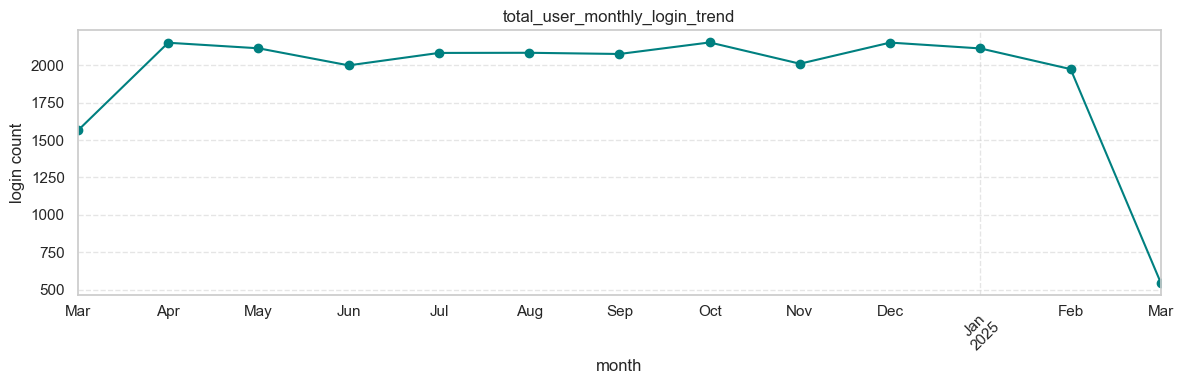

In [79]:
# Last_Login 컬럼을 날짜로 변환
netflix_df['Last_Login'] = pd.to_datetime(netflix_df['Last_Login'], errors='coerce')

# 월 단위로 변환
netflix_df['Login_Month'] = netflix_df['Last_Login'].dt.to_period("M")

# 월별 로그인 수 집계
monthly_logins = netflix_df['Login_Month'].value_counts().sort_index()

# 라인 차트 시각화
monthly_logins.plot(kind='line', marker='o', figsize=(12, 4), color='teal')
plt.title("total_user_monthly_login_trend")
plt.xlabel("month")
plt.ylabel("login count")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


💡잠재적 이탈자 조사

| 위험도 | 조건                         |
| --- |----------------------------|
| ⚠ 낮음 | 낮은 사용시간                    |
| ⚠⚠ 중간 | 오래된 로그인          |
| ⚠⚠⚠ 높음 | Premium + 오래된 로그인 |

In [80]:
#날짜 컬럼을 datetime으로 변환
netflix_df['Last_Login'] = pd.to_datetime(netflix_df['Last_Login'])
netflix_df.info() #datetime으로 잘 변환됐는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               25000 non-null  object        
 1   Age                25000 non-null  int64         
 2   Country            25000 non-null  object        
 3   Subscription_Type  25000 non-null  object        
 4   Watch_Time_Hours   25000 non-null  float64       
 5   Favorite_Genre     25000 non-null  object        
 6   Last_Login         25000 non-null  datetime64[ns]
 7   Login_Month        25000 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(4), period[M](1)
memory usage: 1.5+ MB


In [81]:
netflix_df2 = pd.read_csv('data/netflix_users.csv')

In [82]:
# 날짜 컬럼 변환
netflix_df2['Last_Login'] = pd.to_datetime(netflix_df2['Last_Login'], errors='coerce')

# 날짜 기준 지정
cutoff_date = pd.to_datetime('2024-03-15')

# 조건: 로그인 오래된 사람
old_login = netflix_df2[netflix_df2['Last_Login'] < cutoff_date]

# 조건: 사용시간 < 30
low_usage = netflix_df2[netflix_df2['Watch_Time_Hours'] < 30]

# 구독 타입별 오래된 로그인 사용자 수
old_login_by_sub = old_login.groupby('Subscription_Type')[['User_ID']].count().rename(columns={'User_ID': 'Old_Login_Count'})

# 구독 타입별 낮은 사용량 사용자 수
low_usage_by_sub = low_usage.groupby('Subscription_Type')[['User_ID']].count().rename(columns={'User_ID': 'Low_Usage_Count'})

# 전체 사용자 수
total_by_sub = netflix_df2.groupby('Subscription_Type')[['User_ID']].count().rename(columns={'User_ID': 'Total_Users'})

# 결과 병합
result = total_by_sub.join(old_login_by_sub).join(low_usage_by_sub)

# 결측값 처리 및 정수형 변환
result = result.fillna(0).astype(int)

# 출력
print(result)


                   Total_Users  Old_Login_Count  Low_Usage_Count
Subscription_Type                                               
Basic                     8356              162              230
Premium                   8402              144              254
Standard                  8242              142              227


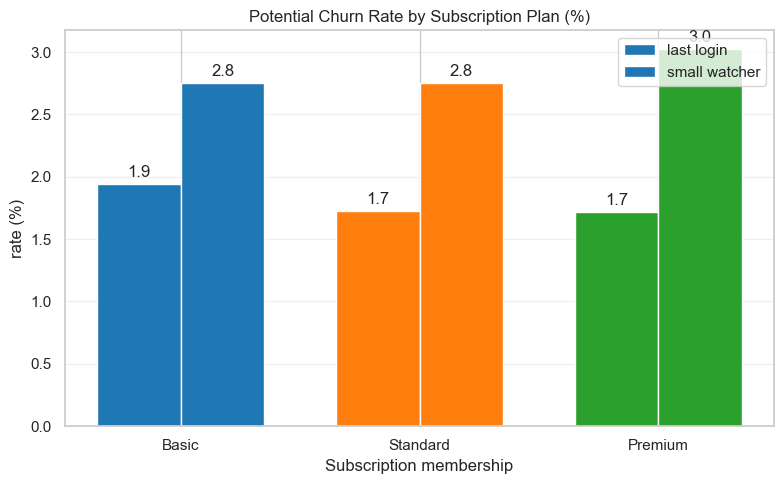

In [83]:
# 조건 정의
netflix_df2['Old_Login'] = netflix_df2['Last_Login'] < cutoff_date
netflix_df2['Low_Usage'] = netflix_df2['Watch_Time_Hours'] < 30

# 구독 타입별 집계
result = netflix_df2.groupby('Subscription_Type').agg(
    Total_Users=('User_ID', 'count'),
    Old_Login_Count=('Old_Login', 'sum'),
    Low_Usage_Count=('Low_Usage', 'sum')
).reset_index().set_index('Subscription_Type')

# 비율 계산
result['Old_Login_Rate'] = (result['Old_Login_Count'] / result['Total_Users']) * 100
result['Low_Usage_Rate'] = (result['Low_Usage_Count'] / result['Total_Users']) * 100

# 원하는 순서대로 인덱스 정렬
desired_order = ['Basic', 'Standard', 'Premium']
result = result.reindex(desired_order)

# 색상 지정 (구독 유형별 색 고정)
colors = {
    'Basic': '#1f77b4',     # 파랑
    'Standard': '#ff7f0e',  # 주황
    'Premium': '#2ca02c'    # 초록
}
bar_colors = [colors[stype] for stype in result.index]

# 시각화
import numpy as np

x = np.arange(len(result))  # 구독 유형별 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(8, 5))

# Old_Login_Rate 막대
bars1 = ax.bar(x - width/2, result['Old_Login_Rate'], width, label='last login', color=bar_colors)

# Low_Usage_Rate 막대
bars2 = ax.bar(x + width/2, result['Low_Usage_Rate'], width, label='small watcher', color=bar_colors)

# 라벨 및 설정
ax.set_title('Potential Churn Rate by Subscription Plan (%)')
ax.set_xlabel('Subscription membership')
ax.set_ylabel('rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(result.index)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

# 레이블 표시
ax.bar_label(bars1, fmt='%.1f', padding=3)
ax.bar_label(bars2, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()


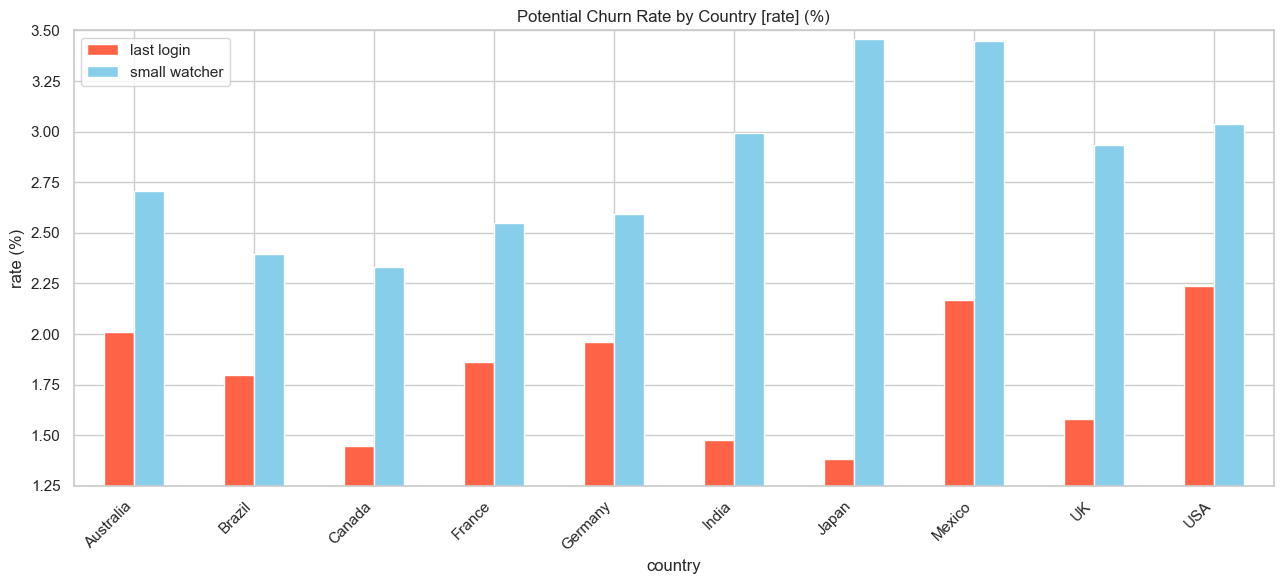

In [84]:
# 국가별 집계,
country_result = netflix_df2.groupby('Country').agg(
    Total_Users=('User_ID', 'count'),
    Old_Login_Count=('Old_Login', 'sum'),
    Low_Usage_Count=('Low_Usage', 'sum')
).reset_index().set_index('Country')

# 비율 계산,
country_result['Old_Login_Rate'] = (country_result['Old_Login_Count'] / country_result['Total_Users']) * 100
country_result['Low_Usage_Rate'] = (country_result['Low_Usage_Count'] / country_result['Total_Users']) * 100

# 시각화,
plt.figure(figsize=(13, 6))
country_result[['Old_Login_Rate', 'Low_Usage_Rate']].plot(
    kind='bar',
    color=['tomato', 'skyblue'],
    ax=plt.gca()
)
plt.title('Potential Churn Rate by Country [rate] (%)')
plt.xlabel('country')
plt.ylabel('rate (%)')
plt.ylim([1.25, 3.5])  # 강조 범위
plt.xticks(rotation=45, ha='right')
plt.legend(['last login', 'small watcher'], loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows용 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 정상 표시 (음수 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False


In [93]:
# 나이그룹 범주형
netflix_df3 = pd.read_csv('data/netflix_users.csv')
netflix_df3['Age_cat'] = pd.cut(netflix_df3['Age'], bins=[10, 20, 30, 60, netflix_df3['Age'].max()],
                                labels=['Teenager', 'Young Adult', 'Adult', 'Senior'])

# User_ID → 인덱스 처리 (필요 시 주석 해제)
# netflix_df3.set_index('User_ID', inplace=True)

# 기본 정보 출력
netflix_df3.info()
netflix_df3.head(3)

# 날짜 컬럼 처리
netflix_df3["Last_Login"] = pd.to_datetime(netflix_df3['Last_Login'])
netflix_df3['Day_Name'] = netflix_df3['Last_Login'].dt.day_name()

# 결과 확인
display(netflix_df3[['Last_Login', 'Day_Name']].head())
netflix_df3.columns
netflix_df3.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User_ID            25000 non-null  int64   
 1   Name               25000 non-null  object  
 2   Age                25000 non-null  int64   
 3   Country            25000 non-null  object  
 4   Subscription_Type  25000 non-null  object  
 5   Watch_Time_Hours   25000 non-null  float64 
 6   Favorite_Genre     25000 non-null  object  
 7   Last_Login         25000 non-null  object  
 8   Age_cat            25000 non-null  category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 1.6+ MB


,Last_Login,Day_Name
0,2024-05-12,Sunday
1,2025-02-05,Wednesday
2,2025-01-24,Friday
3,2024-03-25,Monday
4,2025-01-14,Tuesday


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_cat,Day_Name
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,Teenager,Sunday
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,Young Adult,Wednesday
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,Adult,Friday


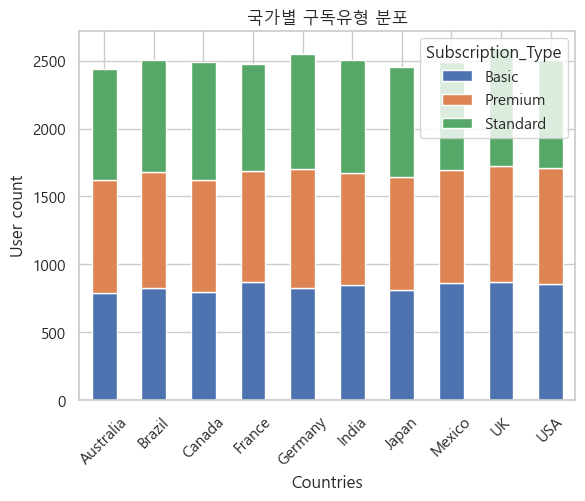

In [94]:
# 1. 국가별 구독유형 분포
# 결측치가 없으므로 Name 컬럼 기준으로 count
# unstack할 경우 pivot 테이블처럼 만든다
country_sub = netflix_df3.groupby(['Country', 'Subscription_Type'])['Name'].count().unstack(fill_value=0)

# 시각화
country_sub.plot(kind='bar', stacked=True)
plt.title('국가별 구독유형 분포')
plt.xlabel('Countries')
plt.ylabel('User count')
plt.xticks(rotation=45)
plt.show()


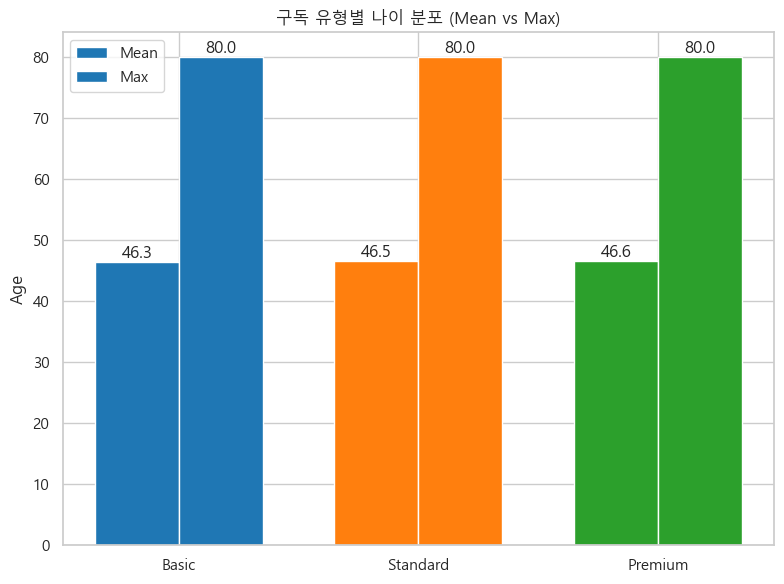

In [95]:
import numpy as np
import matplotlib.pyplot as plt

colors = {
    'Basic': '#1f77b4',     # 파랑
    'Standard': '#ff7f0e',  # 주황
    'Premium': '#2ca02c'    # 초록
}

age_stats = netflix_df3.groupby('Subscription_Type')['Age'].agg(['mean', 'max'])
age_stats = age_stats.reindex(['Basic', 'Standard', 'Premium'])

labels = age_stats.index.tolist()
mean_values = age_stats['mean'].values
max_values = age_stats['max'].values

x = np.arange(len(labels))  # 막대 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(8,6))

# mean 막대
bars1 = ax.bar(x - width/2, mean_values, width, label='Mean', color=[colors[label] for label in labels])

# max 막대
bars2 = ax.bar(x + width/2, max_values, width, label='Max', color=[colors[label] for label in labels])

# 값 표시
ax.bar_label(bars1, fmt='%.1f')
ax.bar_label(bars2, fmt='%.1f')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Age')
ax.set_title('구독 유형별 나이 분포 (Mean vs Max)')
ax.legend()

plt.tight_layout()
plt.show()


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_8848\3928264613.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre = sns.catplot(


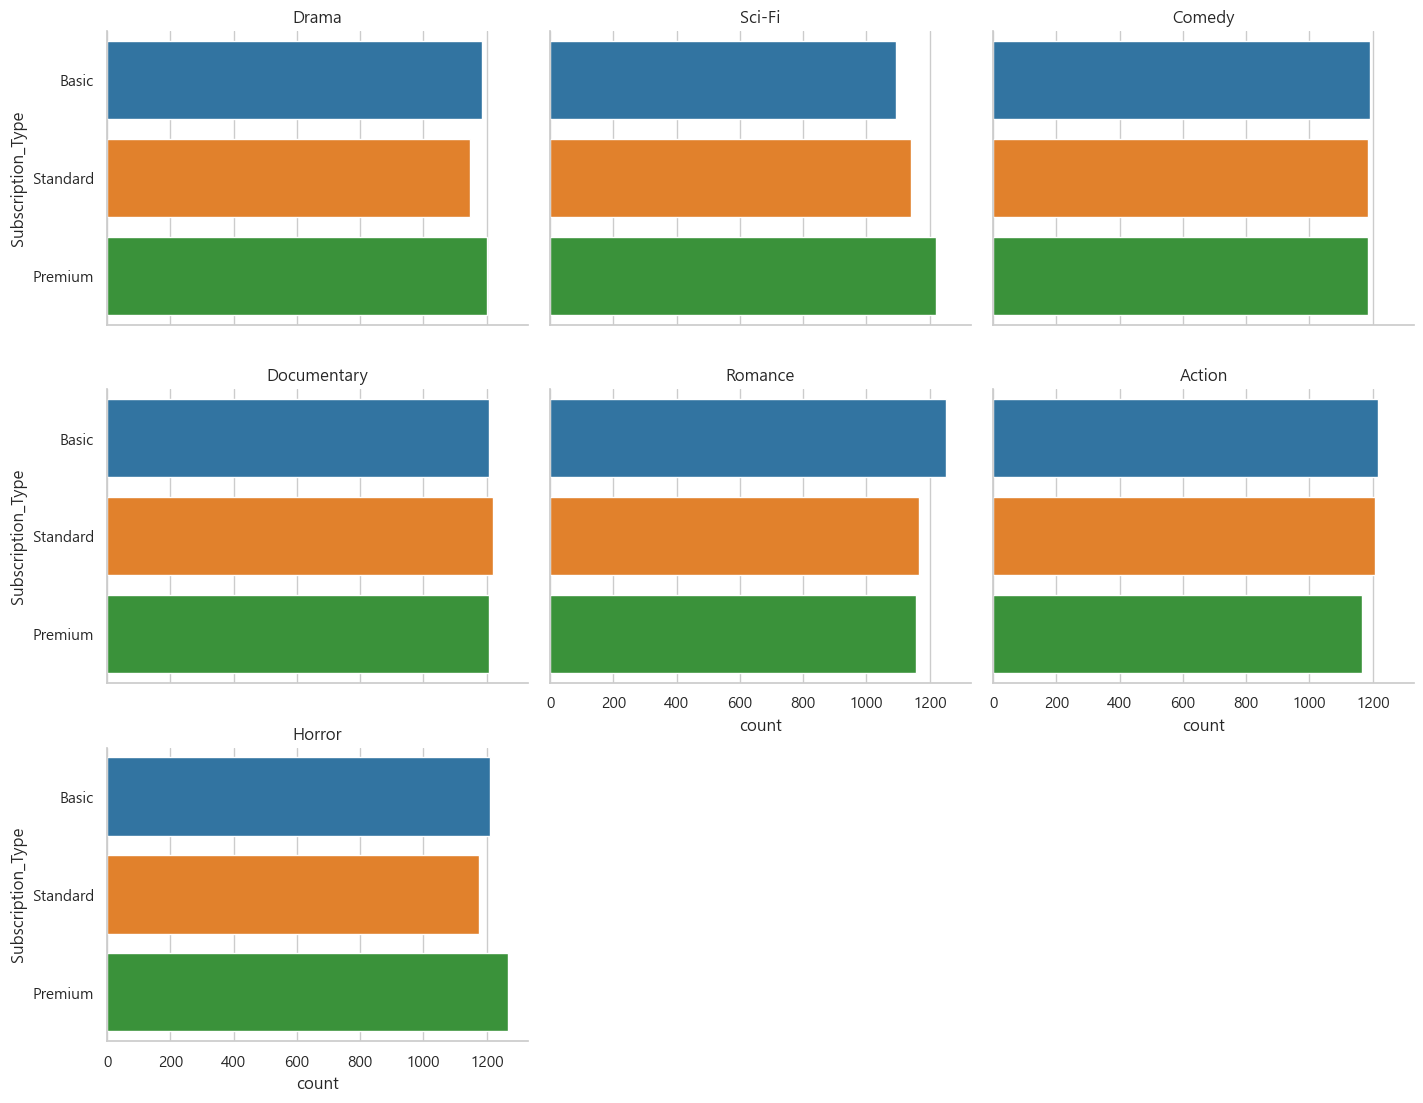

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# 고정 색상 정의
colors = {
    'Basic': '#1f77b4',     # 파랑
    'Standard': '#ff7f0e',  # 주황
    'Premium': '#2ca02c'    # 초록
}

# 장르별 구독유형 분포 시각화 (색상 고정)
genre = sns.catplot(
    data=netflix_df3,
    kind='count',
    y='Subscription_Type',
    col='Favorite_Genre',
    col_wrap=3,
    height=4,
    aspect=1.2,
    order=['Basic', 'Standard', 'Premium'],
    palette=colors  # 고정된 색상 사용
)

# 제목 및 여백 조정
genre.set_titles("{col_name}")
genre.fig.subplots_adjust(top=0.9)
plt.show()


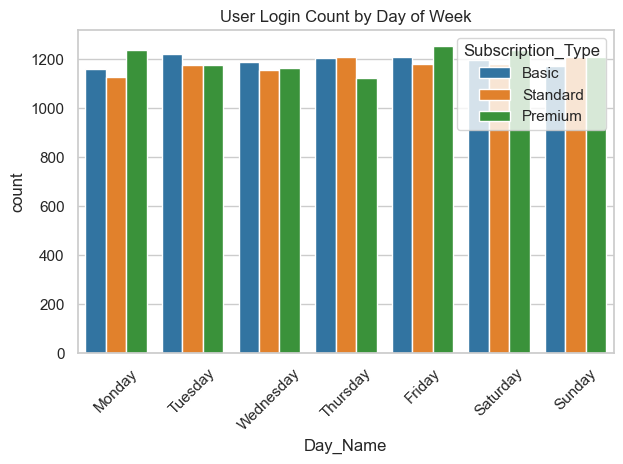

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# 구독유형별 고정 색상
colors = {
    'Basic': '#1f77b4',     # 파랑
    'Standard': '#ff7f0e',  # 주황
    'Premium': '#2ca02c'    # 초록
}

# 요일 순서 지정
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 시각화
sns.countplot(
    data=netflix_df3,
    x='Day_Name',
    hue='Subscription_Type',
    order=days_order,
    hue_order=['Basic', 'Standard', 'Premium'],  # 순서 고정
    palette=colors
)
plt.title('User Login Count by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


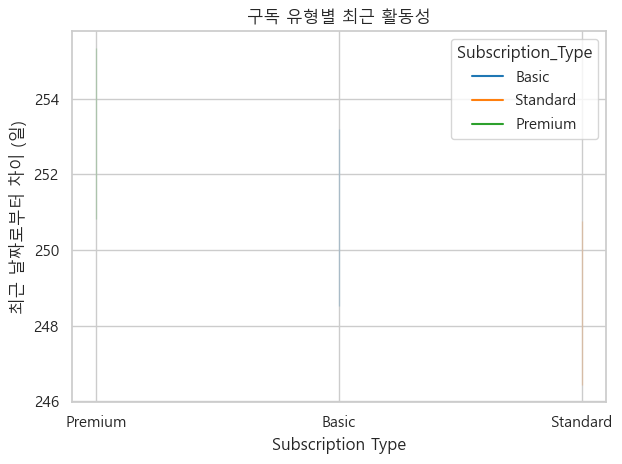

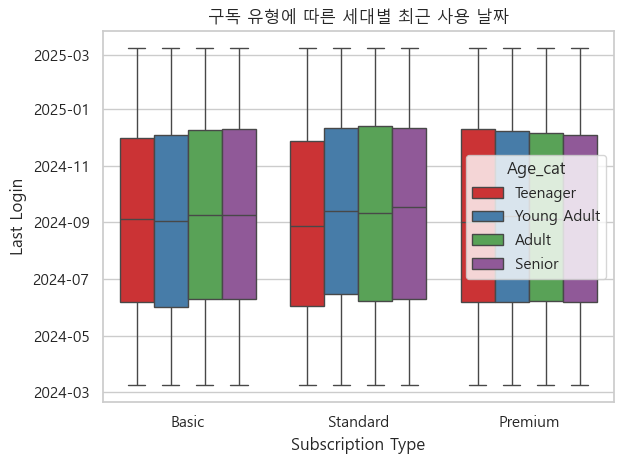

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 구독 유형별 색상 고정
colors = {
    'Basic': '#1f77b4',     # 파랑
    'Standard': '#ff7f0e',  # 주황
    'Premium': '#2ca02c'    # 초록
}

type_order = ['Basic', 'Standard', 'Premium']

# 최근 로그인 날짜 차이 계산
netflix_df3['Recent_Login'] = (pd.Timestamp('today') - netflix_df3['Last_Login']).dt.days

# 1) 라인플롯: 구독 유형별 최근 활동성
sns.lineplot(
    data=netflix_df3,
    x='Subscription_Type',
    y='Recent_Login',
    hue='Subscription_Type',
    hue_order=type_order,
    palette=colors
)
plt.title('구독 유형별 최근 활동성')
plt.ylabel('최근 날짜로부터 차이 (일)')
plt.xlabel('Subscription Type')
plt.tight_layout()
plt.show()

# 2) 박스플롯: 구독 유형별, 세대별 최근 로그인 날짜
sns.boxplot(
    data=netflix_df3,
    x='Subscription_Type',
    y='Last_Login',
    order=type_order,
    hue='Age_cat',
    palette='Set1'   # Age_cat은 기본 팔레트 유지(필요시 별도 지정 가능)
)
plt.title('구독 유형에 따른 세대별 최근 사용 날짜')
plt.ylabel('Last Login')
plt.xlabel('Subscription Type')
plt.tight_layout()
plt.show()


In [91]:
# 범주형 변수 인코딩
netflix_encoded = pd.get_dummies(netflix_df, columns=['Subscription_Type', 'Favorite_Genre', 'Country'])

# 수치형 데이터만 선택하여 상관관계 분석
numeric_columns = netflix_encoded.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()['Watch_Time_Hours'].sort_values(ascending=False)



<Figure size 1200x800 with 0 Axes>

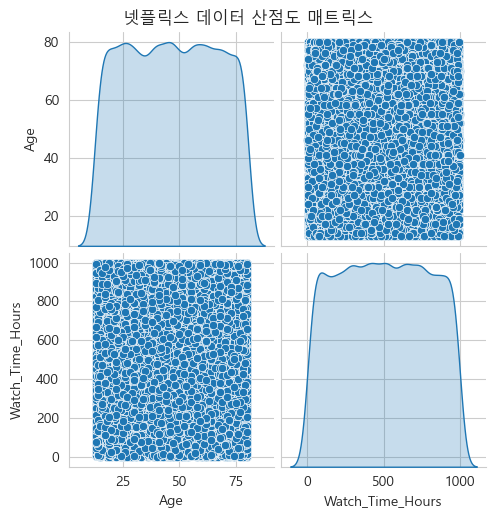

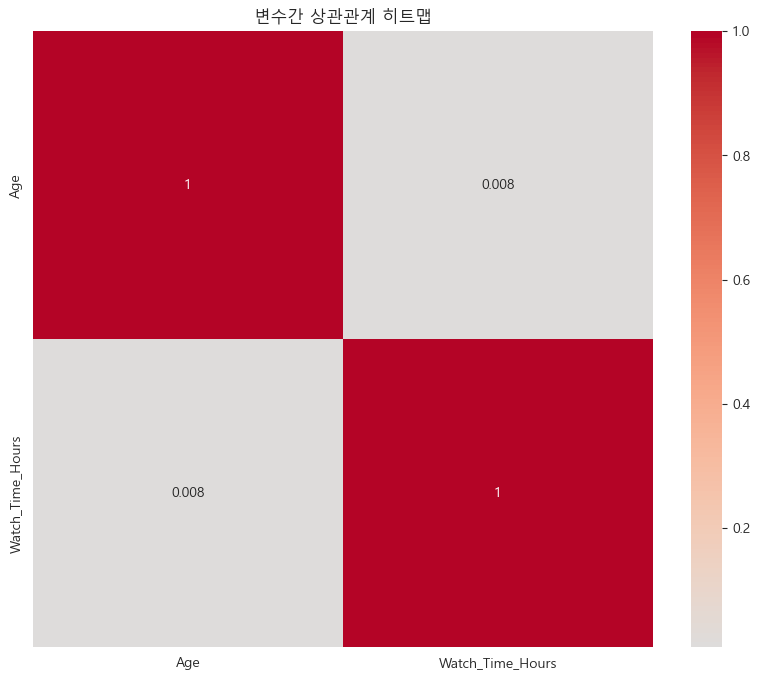

In [40]:
#6. Seaborn Pairplot

numeric_cols = netflix_encoded.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.pairplot(netflix_encoded[numeric_cols], diag_kind='kde')
plt.suptitle('넷플릭스 데이터 산점도 매트릭스', y=1.02)
plt.show()

# 7. Seaborn Heatmap 히트맵으로 상관관계 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = netflix_encoded[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('변수간 상관관계 히트맵')
plt.show()